## Decision Tree Regression Micro Project
### Data obtained from Kaggle: World Happiness Report 2017
### Dataset Link: https://www.kaggle.com/unsdsn/world-happiness/downloads/world-happiness-report.zip/2

In [33]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.tree import DecisionTreeRegressor

In [34]:
data = pd.read_csv('2017.csv')

In [35]:
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [36]:
data.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


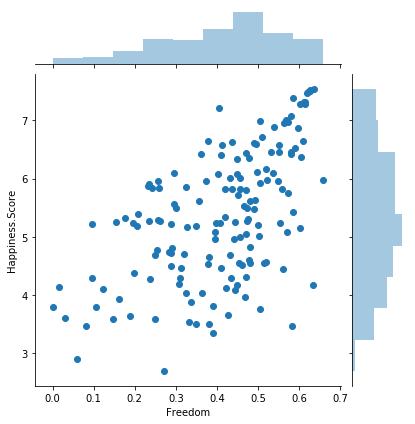

In [37]:
## lets explore the correlation between happiness and the calculated freedom of the recorded countries

sn.jointplot(x='Freedom',y='Happiness.Score',data=data)

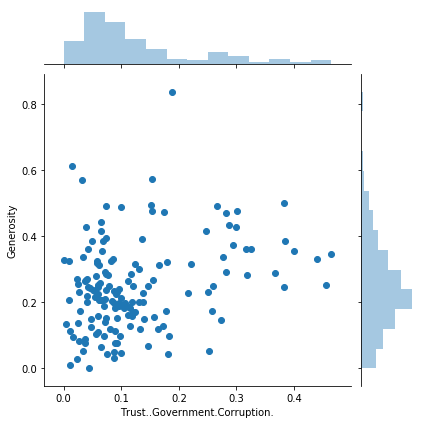

In [38]:
sn.jointplot(x='Trust..Government.Corruption.',y='Generosity',data=data)

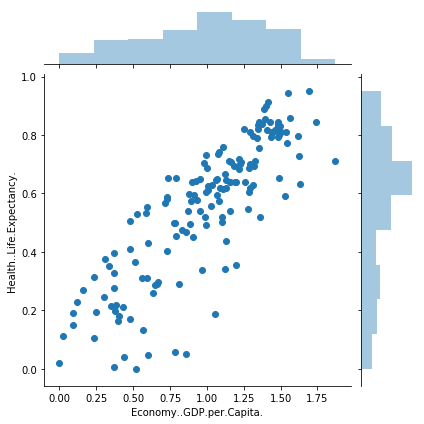

In [39]:
sn.jointplot(x='Economy..GDP.per.Capita.',y='Health..Life.Expectancy.',data=data)

### Building the Model

##### The 'Country' data column is categorical. So in order to make use of all the data including categorical variables, there is a need to initialize a dummy variable, then concatenate the dummy variable to the main dataset.


In [40]:
country = ['Country']

In [41]:
final_data = pd.get_dummies(data,columns=country, drop_first=True)

In [42]:
final_data.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,...,0,0,0,0,0,0,0,0,0,0
1,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,...,0,0,0,0,0,0,0,0,0,0
2,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,...,0,0,0,0,0,0,0,0,0,0
3,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,...,0,0,0,0,0,0,0,0,0,0
4,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,...,0,0,0,0,0,0,0,0,0,0


#### Train-Test Split

In [43]:
X = final_data.drop('Happiness.Score',axis=1)
y = final_data['Happiness.Score']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Training the model

In [47]:
dtree= DecisionTreeRegressor() ### Regressor is used instead of classification. Before it gave an error of type continuos cause of many float values

In [48]:
dtree.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
predictions = dtree.predict(X_test)


In [55]:
dtree.score(X_test, y_test)  ### classification report can not be used cause we are not applying classification but rather regression


0.9966945575428552